# Basic Image Operations in Python

This is the reading note of chapter 1 ([BOOK Link](http://programmingcomputervision.com/downloads/ProgrammingComputerVision_CCdraft.pdf)). Part of the contents are adopted from this [tutorial](http://cs231n.github.io/python-numpy-tutorial/#numpy).

Official python documentation: [LINK](https://docs.python.org/3.6/index.html)

In [13]:
from PIL import Image
from numpy import *
from scipy.ndimage import measurements, filters
from pylab import *

## PIL library

In [14]:
# read a single image
pil_im = Image.open('seattle.jpg')

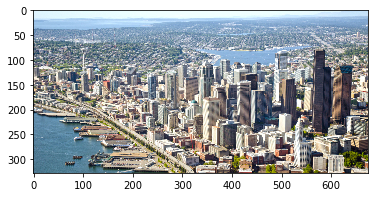

In [15]:
# read all images in a folder 
import os

path = './sample_image_list'

# get all the file names as a list
file_names = [os.path.join(path, f) for f in os.listdir(path) if f.endswith('.jpg')]
# Then, it is easy to read all images in for loop
image_list = []
for fname in file_names:
    im = Image.open(fname)
    image_list.append(im)

# display the first image loaded from the folder
imshow(array(image_list[0]))
show()

PIL is an important tool in python to work with images, such as resize, crop, histogram, ect.. On the other hand, NumPy is the main tool for computation on images, which will treat images as array. Certain operations on images, such as resizing, are not natural on array representation. In those situations, arrays need to be converted to an PIL object using Image.fromarray(uint8(xxxx)). Full documentation of PIL can be found at http://effbot.org/imagingbook/

## NumPy library

NumPy is the key library for scientific computing in python. For new python users moving from Matlab, this [tutorial](http://scipy.github.io/old-wiki/pages/NumPy_for_Matlab_Users) can be very helpful. 

In [17]:
# convert PIL image object to the array representation in numpy
im = array(pil_im.convert('L'))

# data size, data type, 
print(im.shape, im.dtype)

# regular indexing (more indexing techniques, such as integer indexing and boolean indexing,
# can be found at http://scipy-cookbook.readthedocs.io/items/Indexing.html)
print(im[0,0])
print(im[:3,:2])
print(im[-1,-2])

# simply math
print(im[:10,4:5].sum())
print(im[-1,:].mean())

# before transforming back to PIL objects, make sure the data type is uint8
pil_im_back = Image.fromarray(uint8(im))

(300, 578) uint8
209
[[209 208]
 [209 209]
 [211 211]]
5
2117
15.669550173


With such scientic computing operations, it is easy to implement histogram normalization, image averaging, PCA, etc..

## SciPy library

SciPy is built on NumPy and provides lots of functions operating on arrays, which makes image processing efficient in python. A compelte guide can be found [HERE](http://scipy-cookbook.readthedocs.io/).

#### Filters

In [24]:
# gaussian blurring
im_blur = filters.gaussian_filter(im,5)

# image gradient as convolution with Sobel filter
gradient_x = filters.sobel(im, 0)
gradient_y = filters.sobel(im, 1)
magnitude = sqrt(gradient_x**2 + gradient_y**2)

#### Morphological Operations

In [34]:
# thresholding
bw = 1*(im<128)

# find connected component and label matrix
label, nbr_objects = measurements.label(bw)

# opening
from scipy import ndimage
el = ndimage.generate_binary_structure(2, 1)
im_open = ndimage.binary_opening(bw,el)

#### save array as image

In [35]:
import scipy.misc
scipy.misc.imsave('test.png',im)

## Matplotlib and PyLab

Matplotlib an awesome graphic library. PyLab, a module of Matplotlib, is a plotting system similar to Matlab.

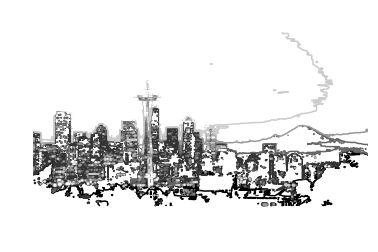

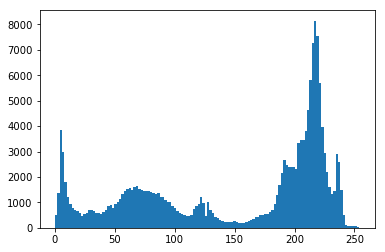

In [36]:
# show image contours and histogram
figure()
gray()
contour(im, origin='image')
axis('equal')
axis('off')

figure()
hist(im.flatten(), 128)
show()

A very important function in PyLab is interactive annotation

In [47]:
# note: the following code cannot working in the notebook due to non-GUI backend

# imshow(im)
# print('please select three points')
# x=ginput(3) 
# print('you selected:', x)
# show()